<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li>
<li><span><a href="#Objective" data-toc-modified-id="Objective-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Correlation-matrix" data-toc-modified-id="Correlation-matrix"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Correlation matrix</a></span></li><li><span><a href="#Handling-missing-value" data-toc-modified-id="Handling-missing-value-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Handling missing value</a></span><li><span><a href="#Handling-categorical-variable" data-toc-modified-id="Handling-categorical-variable-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Handling categorical variable</a></span></li>
<li><span><a href="#Get-features-and-target" data-toc-modified-id="Get-features-and-target-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Get features and target</a></span>
<li><span><a href="#PCA" data-toc-modified-id="PCA-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>PCA</a></span>
<ul class="toc-item">
<li><span><a href="#Without-balancing" data-toc-modified-id="Without-balancing-3.6.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Without balancing</a></span></li>
<li><span><a href="#With-balancing" data-toc-modified-id="With-balancing-3.6.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>With balancing</a></span></li></ul></li>
<li><span><a href="#Data-split" data-toc-modified-id="Data-split-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Data split</a></span></li>
<li><span><a href="#Resampling" data-toc-modified-id="Resampling-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Resampling</a></span></li></ul></li>
<li><span><a href="#Model-setup" data-toc-modified-id="Model-setup-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model setup</a></span>
<ul class="toc-item">
<li><span><a href="#Import-models" data-toc-modified-id="Import-models-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Import models</a></span></li>
<li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Evaluation</a></span></li>
<li><span><a href="#Model-selection" data-toc-modified-id="Model-selection-4.4"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Model selection</a></span></li>
    <ul class="toc-item">
<li><span><a href="#Create-the-dictionary-of-classifiers" data-toc-modified-id="Create-the-dictionary-of-classifiers-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Create the dictionary of classifiers</a></span></li>
<li><span><a href="#Create-the-dictionary-of-pipeline" data-toc-modified-id="Create-the-dictionary-of-pipeline-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Create the dictionary of pipeline</a></span></li>
<li><span><a href="#Create-the-dictionary-of-parameter-grids" data-toc-modified-id="Create-the-dictionary-of-parameter-grids-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Create the dictionary of parameter grids</a></span></li></ul>
<li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Hyperparameter tuning</a></span></li></ul>
<li><span><a href="#Improvement" data-toc-modified-id="Improvement-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Improvement</a></span>
<ul class="toc-item">
<li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Feature importance</a></span></li>
<li><span><a href="#Ensemble-models" data-toc-modified-id="Ensemble-models-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Ensemble models</a></span></li></ul></li>
<li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

Santander, a wholly-owned subsidiary of Spanish Santander Group, commits to helping people and businesses get better in finance. For these reasons, Kagglers was invited by Santander to help them find which clients would be able to make specific trades in the future.

In this challenge, the data provided by the contest has the same structure as the real data that solved the problem, but the data is anonymized. 


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
import multiprocessing
n_jobs = multiprocessing.cpu_count()-1

In [4]:
n_jobs

3

# Objective

In this project, we aim to solve the binary classification problems. We need to predict the value of target in the testing set.

In the following, we will explore the dataset, prepare it for several models, train them and find the best model for our dataset.

# Data Preprocessing

This dataset contains 200 numeric feature variables and 1 binary target.

Both training set and testing set have 200 thousands rows. 

## Load data

In [5]:
import os
FILEDIR = '../input/santander-customer-transaction-prediction-dataset/'
os.listdir(FILEDIR)

['test.csv', 'train.csv']

In [6]:
# Load data
df = pd.read_csv(FILEDIR + 'train.csv',
                 header=0)

df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [7]:
df.shape

(200000, 202)

## Correlation matrix

In [8]:
correlation = df.iloc[:, 1:].corr()
correlation

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.028285,0.002073,-0.000785,-0.001070,0.001206,0.003706,-0.001274,0.001244,0.001854,0.001396,...,0.004571,0.000870,-0.004745,-0.003143,-0.001201,1.000000,0.002517,-0.004170,-0.000536,0.002042
var_196,0.023608,0.004386,-0.000377,0.003952,-0.002800,0.000513,0.002880,0.005378,0.001045,-0.003242,...,-0.000847,0.002466,-0.001386,-0.005308,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607
var_197,-0.035303,-0.000753,-0.004157,0.001078,0.001164,-0.000046,-0.000535,-0.003565,0.003466,-0.004583,...,-0.004974,0.000906,-0.000527,0.005068,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991
var_198,-0.053000,-0.005776,-0.004861,-0.000877,-0.001651,-0.001821,-0.000953,-0.003025,0.000650,0.002950,...,-0.000153,-0.000067,0.003451,0.001646,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731


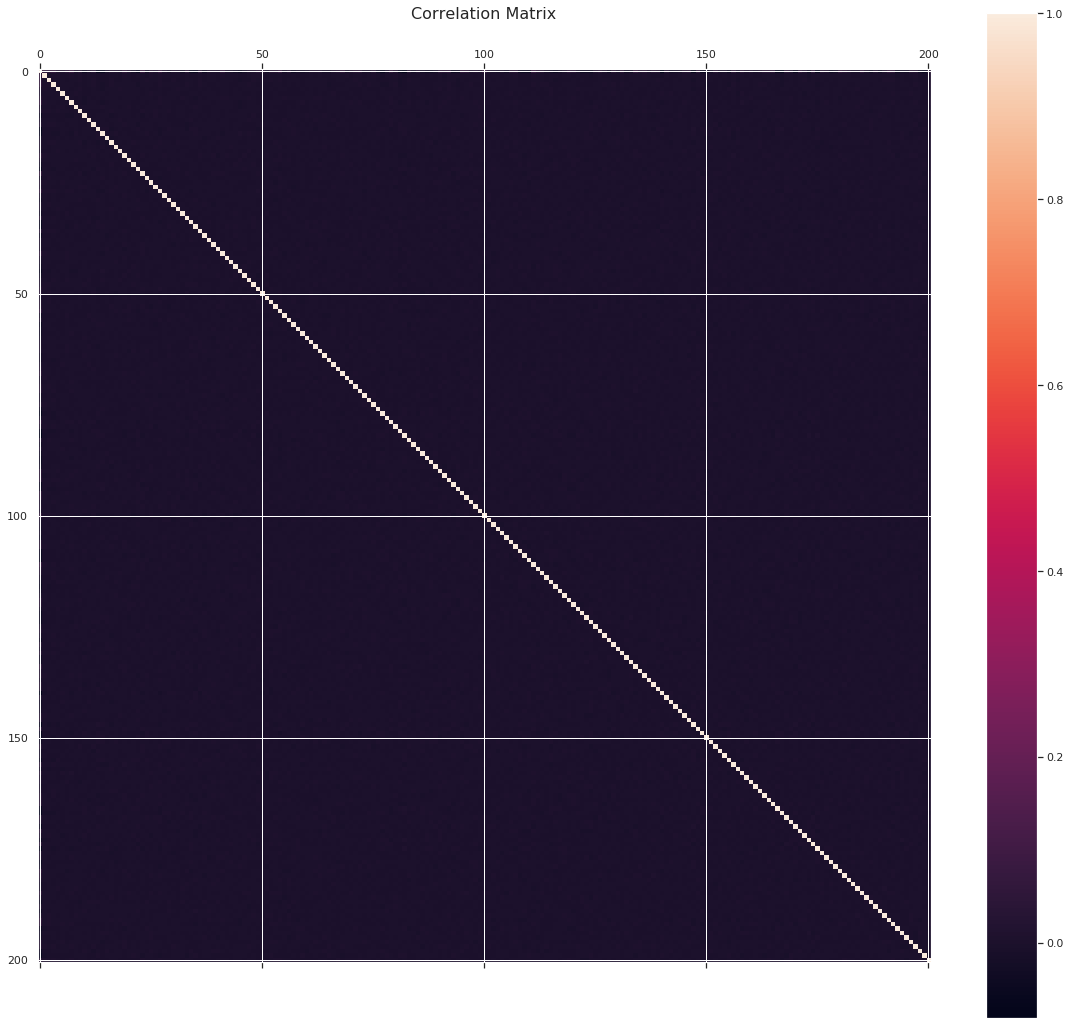

In [9]:
f = plt.figure(figsize=(20, 18))
plt.matshow(correlation, fignum=f.number)
# plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
# plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

$\mu \approx 0$ and $\sigma \approx 0.0025$

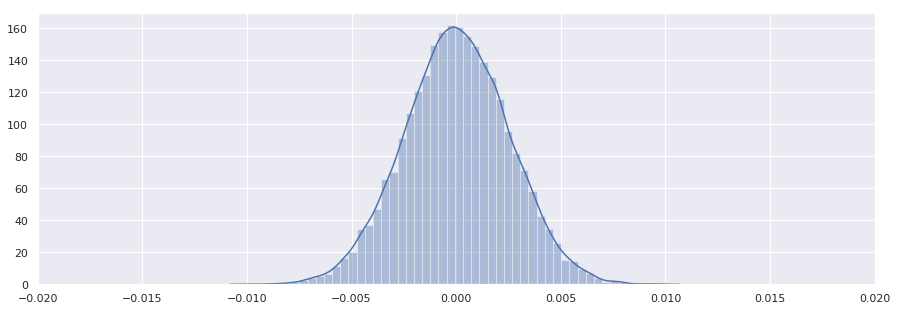

In [10]:
fig = plt.figure(figsize=(15,5))
corr = correlation.iloc[1:,1:].values.reshape(-1,)  # drop target
corr = corr[corr != 1]
sns.distplot(corr)
plt.xlim((-0.02, 0.02))
plt.show()

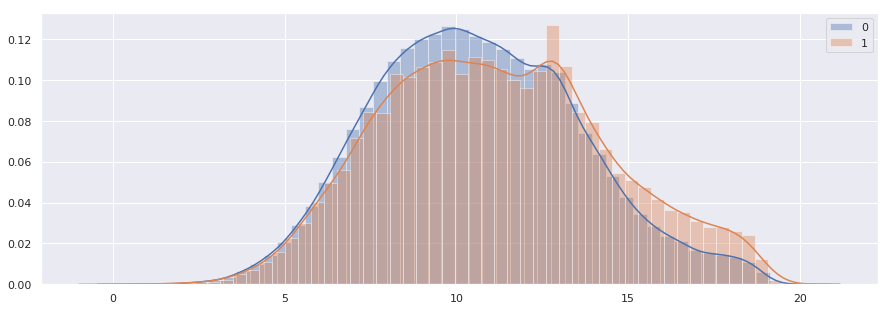

In [11]:
# distribution of var_0
fig = plt.figure(figsize=(15,5))
var_0_0 = df.loc[df['target']==0,df.columns[2]].values.reshape(-1,)
var_0_1 = df.loc[df['target']==1,df.columns[2]].values.reshape(-1,)
sns.distplot(var_0_0)
sns.distplot(var_0_1)
plt.legend([0, 1])
plt.show()

In [12]:
def getplot_var(df, r=4, c=4):
    fig, axs = plt.subplots(r, c, figsize=(c*4, r*3))
    cnt = 0
    for i in range(r):
        for j in range(c):
            sns.distplot(df.loc[df['target']==0,df.columns[cnt+2]].values.reshape(-1,), ax=axs[i,j], axlabel=str(df.columns[cnt+2]))
            sns.distplot(df.loc[df['target']==1,df.columns[cnt+2]].values.reshape(-1,), ax=axs[i,j], axlabel=str(df.columns[cnt+2]))
            axs[i,j].legend([0, 1])
            cnt += 1
    plt.tight_layout()
    return

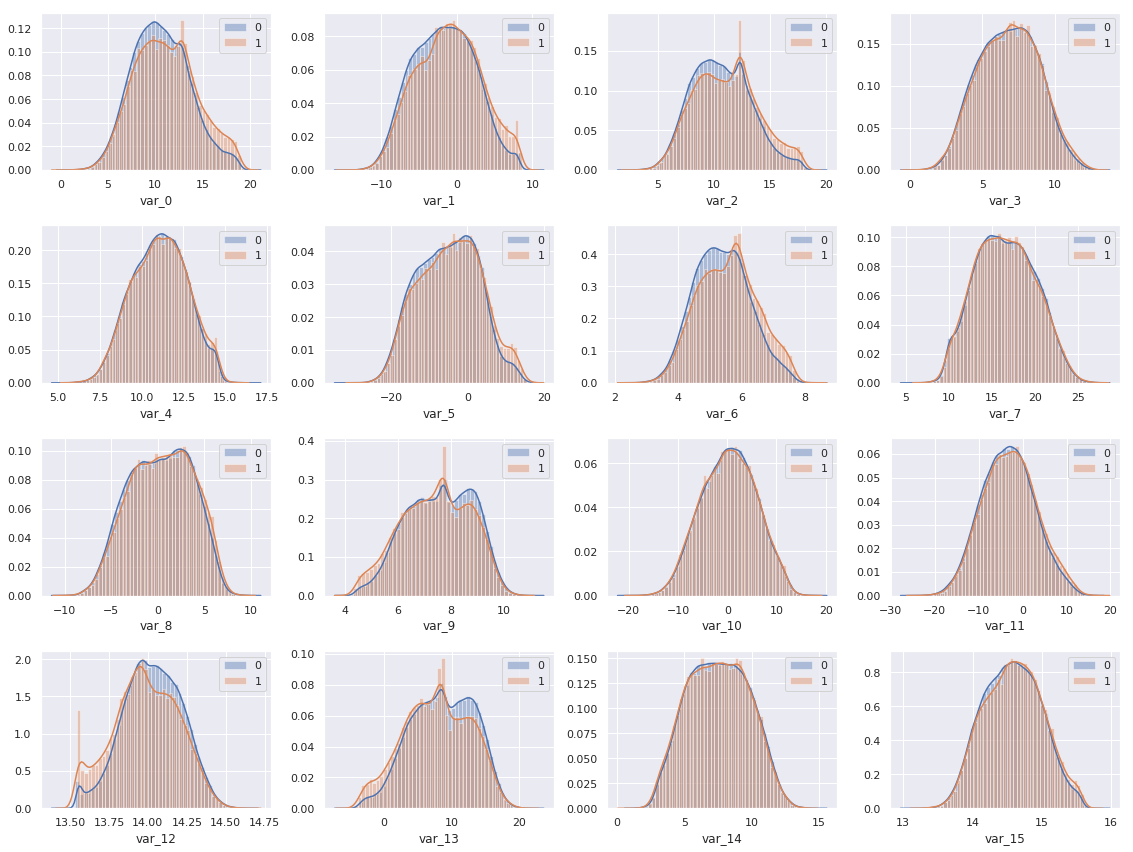

In [13]:
getplot_var(df, 4, 4)

## Handling missing value

In [14]:
def missing_value_checker(df):
    """
    The missing value checker

    Parameters
    ----------
    df : dataframe
    
    Returns
    ----------
    The variables with missing value and their proportion of missing value
    """
    
    variable_proportion = [[variable, df[variable].isna().sum() / df.shape[0]] 
                           for variable in df.columns 
                           if df[variable].isna().sum() > 0]

    print('%-30s' % 'Variable with missing values', 'Proportion of missing values')
    for variable, proportion in sorted(variable_proportion, key=lambda x : x[1]):
        print('%-30s' % variable, proportion)
        
    return variable_proportion

In [15]:
variable_proportion = missing_value_checker(df)

Variable with missing values   Proportion of missing values


## Handling categorical variable

In [16]:
def categorical_feature_checker(df, target, dtype):
    """
    The categorical feature checker

    Parameters
    ----------
    df : dataframe
    target : the target
    dtype : the type of the feature
    
    Returns
    ----------
    The categorical features and their number of unique value
    """
    
    feature_number = [[feature, df[feature].nunique()] 
                      for feature in df.columns 
                      if feature != target and df[feature].dtype.name == dtype]
    
    print('%-30s' % 'Categorical feature', 'Number of unique value')
    for feature, number in sorted(feature_number, key=lambda x : x[1]):
        print('%-30s' % feature, number)
    
    return feature_number

In [17]:
feature_number = categorical_feature_checker(df, 'target', 'object')

Categorical feature            Number of unique value
ID_code                        200000


## Get features and target

In [18]:
X_raw = df.drop(['ID_code', 'target'], axis=1)
y_raw = df['target']

## PCA

### Without balancing

Using PCA to take a glance at the distribution of this high dimensional dataset (without balancing)

In [19]:
X, y = X_raw.copy(), y_raw.copy()

In [20]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', '^']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [21]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_space(X, y):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for m, c, label in [('o', '#1F77B4', 0), ('^', '#FF7F0E', 1)]:
        xs = X[y==label].T[0]
        ys = X[y==label].T[1]
        zs = y[y==label]
        ax.scatter(xs, ys, zs, c=c, marker=m)

    ax.set_xlabel('PC1 Label')
    ax.set_ylabel('PC2 Label')
    ax.set_zlabel('Target')
    # rotate the axes and update
#     for angle in range(0, 360):
#         ax.view_init(30, angle)
#         plt.draw()
#         plt.pause(.001)
    plt.show()

### With balancing

In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
# X_test = ss.transform(X_test)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)

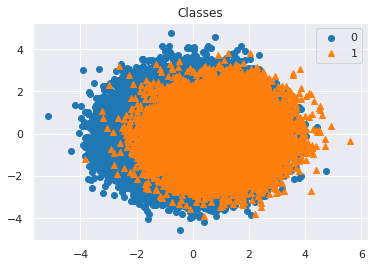

In [24]:
plot_2d_space(pca_X, y)

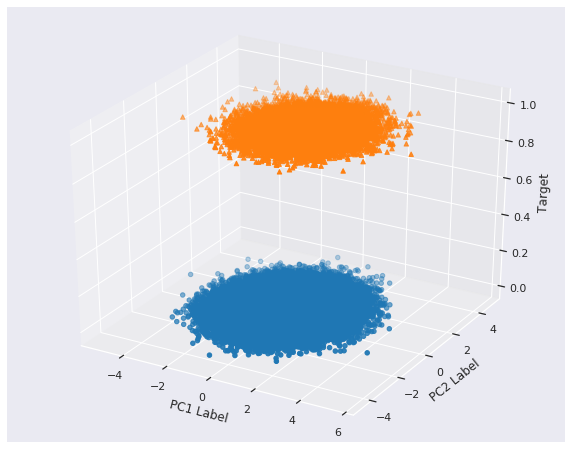

In [25]:
plot_3d_space(pca_X, y)

In [26]:
# %matplotlib qt  #interactive plot
# plot_3d_space(pca_X, y_test)

## Data split

In [27]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=0, stratify=y_raw)

## Resampling

In [28]:
y_raw.value_counts()

0    179902
1     20098
Name: target, dtype: int64

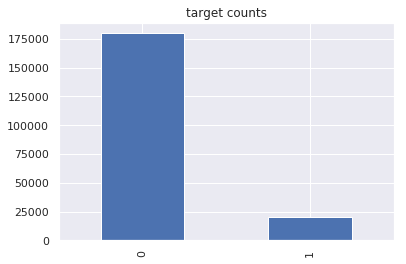

In [29]:
# bar chart
df.target.value_counts().plot(kind='bar', title='target counts')
plt.show()

### Undersampling
In this dataset, we have tried oversampling and undersampling. Actually, their results are very close. Here we use undersampling instead of oversampling because the size of dataset is large enough. Using undersampling can make it efficient in hyperparameter tuning.

In [30]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# RandomOverSampler (with random_state=0)
# ros = RandomOverSampler(random_state=0)
# X, y = ros.fit_sample(X, y)


# adjust the weight of undersampling, 2:1 (for target 0,1) is a little bit better in practice.
num_class1 = len(y[y==1])
rus = RandomUnderSampler(random_state=0, ratio={0: int(1*num_class1), 1: num_class1})

X, y = rus.fit_sample(X, y)
pd.DataFrame(data=y, columns=['target'])['target'].value_counts()

Using TensorFlow backend.


1    16078
0    16078
Name: target, dtype: int64

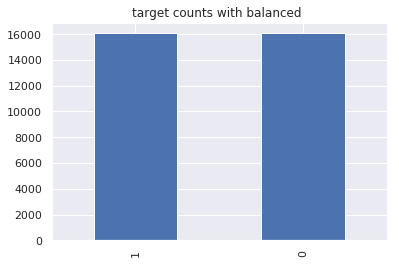

In [31]:
pd.DataFrame(data=y, columns=['target']).target.value_counts().plot(kind='bar', title='target counts with balanced ')
plt.show()

In [32]:
pca_X = pca.fit_transform(X)

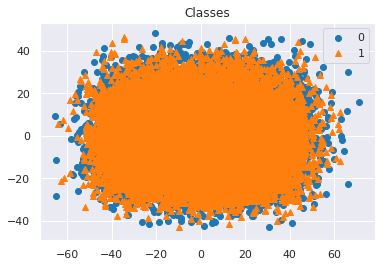

In [33]:
plot_2d_space(pca_X, y)

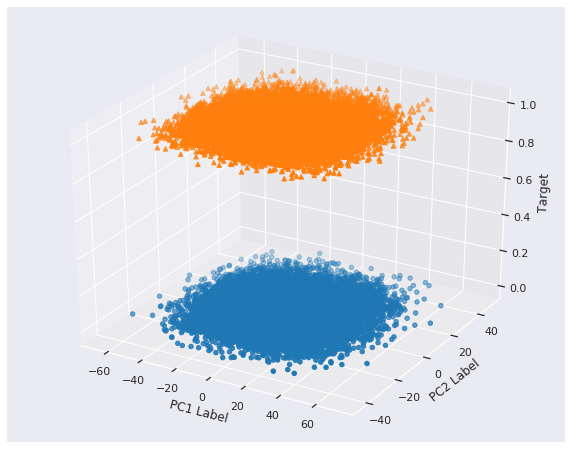

In [34]:
plot_3d_space(pca_X, y)

# Model setup

## Import models

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Evaluation

The roc_auc_score function computes the area under the receiver operating characteristic (ROC) curve.

Compared to metrics such as the subset accuracy, the Hamming loss, or the F1 score, ROC doesn’t require optimizing a threshold for each label.

AUC-ROC curve is one of the most commonly used metrics to evaluate the performance of machine learning algorithms particularly in the case where we have imbalanced datasets.

Note: this implementation is restricted to the binary classification task or multilabel classification task in label indicator format.


In [36]:
from sklearn.metrics import roc_auc_score

# Model selection

## Create the dictionary of classifiers

In [37]:
clfs = {'rf': RandomForestClassifier(random_state=0),
        'lr': LogisticRegression(random_state=0),
        'mlp': MLPClassifier(random_state=0),
        'dt': DecisionTreeClassifier(random_state=0),
        'rf': RandomForestClassifier(random_state=0),
        'xgb': XGBClassifier(seed=0),
#         'svc': SVC(random_state=0),
#         'knn': KNeighborsClassifier(),
        'gnb': GaussianNB()}

## Create the dictionary of pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_clfs = {}

for name, clf in clfs.items():
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()),
                                ('clf', clf)])

## Create the dictionary of parameter grids

In [39]:
# For GridSearchCV

param_grids = {}
# ------
C_range = [10 ** i for i in range(-5, 1)]
param_grid = [{'clf__multi_class': ['ovr'],
               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'clf__C': C_range},

              {'clf__multi_class': ['multinomial'],
               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'clf__C': C_range}]

param_grids['lr'] = param_grid
# ------
param_grid = [{'clf__hidden_layer_sizes': [(10,), (10, 10, 10), (100,)],
               'clf__activation': ['tanh', 'relu']}]

param_grids['mlp'] = param_grid
# ------
param_grid = [{'clf__min_samples_split': [2, 5, 10],
               'clf__min_samples_leaf': [20, 60, 150]}]

param_grids['dt'] = param_grid
# ------
param_grid = [{'clf__n_estimators': [10, 100],
               'clf__min_samples_split': [5, 10, 30],
               'clf__min_samples_leaf': [2, 5, 10]}]

param_grids['rf'] = param_grid
# ------
param_grid = [{'clf__eta': [10 ** i for i in range(-6, -1)],
               'clf__gamma': [0, 10, 100],
               'clf__lambda': [10 ** i for i in range(-6, -1)]}]

param_grids['xgb'] = param_grid
# ------
param_grid = [{'clf__C': [10 ** i for i in range(-4, 5)],
               'clf__gamma': ['auto', 'scale']}]

param_grids['svc'] = param_grid
# ------
param_grid = [{'clf__n_neighbors': list(range(1, 11))}]

param_grids['knn'] = param_grid
# ------
param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-12, -4)]}]

param_grids['gnb'] = param_grid

In [40]:
# best parameter (selected after GSCV)

param_grids = {}
# ------
C_range = [0.001]
param_grid = [{'clf__multi_class': ['ovr'],
               'clf__solver': ['sag'],
               'clf__C': C_range}]

param_grids['lr'] = param_grid
# ------
param_grid = [{'clf__hidden_layer_sizes': [(10,)],
               'clf__activation': ['relu']}]

param_grids['mlp'] = param_grid
# ------
param_grid = [{'clf__min_samples_split': [2],
               'clf__min_samples_leaf': [150]}]

param_grids['dt'] = param_grid
# ------
param_grid = [{'clf__n_estimators': [200],
               'clf__min_samples_split': [30],
               'clf__min_samples_leaf': [2]}]

param_grids['rf'] = param_grid
# ------
param_grid = [{'clf__eta': [1e-6],
               'clf__gamma': [10],
               'clf__lambda': [1e-6]}]

param_grids['xgb'] = param_grid
# ------
param_grid = [{'clf__C': [0.1],
               'clf__gamma': ['auto']}]

param_grids['svc'] = param_grid
# ------
param_grid = [{'clf__n_neighbors': 10}]

param_grids['knn'] = param_grid
# ------
param_grid = [{'clf__var_smoothing': [1e-12]}]

param_grids['gnb'] = param_grid


## Hyperparameter tuning

**ATTENTION. PLEASE AVIOD TO RUN THIS PART. IT WILL TAKE HOURS.**  
We run this code in AWS, so no results here.  

Separately grid search.

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# ------
gsRF = GridSearchCV(pipe_clfs['rf'], param_grid=param_grids['rf'],
                    cv=StratifiedKFold(n_splits=4, random_state=0),
                    scoring="roc_auc", n_jobs=-1, verbose=1)

gsRF.fit(X, y)
RF_best = gsRF.best_estimator_
print(gsRF.best_score_, gsRF.best_estimator_)
# ------
gsXGB = GridSearchCV(pipe_clfs['xgb'], param_grid=param_grids['xgb'],
                    cv=StratifiedKFold(n_splits=4, random_state=0),
                    scoring="roc_auc", n_jobs=-1, verbose=1)

gsXGB.fit(X, y)
XGB_best = gsXGB.best_estimator_
print(gsXGB.best_score_, gsXGB.best_estimator_)
# ------
gsLR = GridSearchCV(pipe_clfs['lr'], param_grid=param_grids['lr'],
                    cv=StratifiedKFold(n_splits=4, random_state=0),
                    scoring="roc_auc", n_jobs=-1, verbose=1)

gsLR.fit(X, y)
LR_best = gsLR.best_estimator_
print(gsLR.best_score_, gsLR.best_estimator_)
# ------
gsGNB = GridSearchCV(pipe_clfs['gnb'], param_grid=param_grids['gnb'],
                    cv=StratifiedKFold(n_splits=4, random_state=0),
                    scoring="roc_auc", n_jobs=-1, verbose=1)

gsGNB.fit(X, y)
GNB_best = gsGNB.best_estimator_
print(gsGNB.best_score_, gsGNB.best_estimator_)
# ------
# gsSVC = GridSearchCV(pipe_clfs['svc'], param_grid=param_grids['svc'],
#                     cv=StratifiedKFold(n_splits=4, random_state=0),
#                     scoring="roc_auc", n_jobs=-1, verbose=1)
#
# gsSVC.fit(X, y)
# SVC_best = gsSVC.best_estimator_
# print(gsSVC.best_score_, gsSVC.best_estimator_)
# ------
# gsKNN = GridSearchCV(pipe_clfs['knn'], param_grid=param_grids['knn'],
#                     cv=StratifiedKFold(n_splits=4, random_state=0),
#                     scoring="roc_auc", n_jobs=-1, verbose=1)
#
# gsKNN.fit(X, y)
# KNN_best = gsKNN.best_estimator_
# print(gsKNN.best_score_, gsKNN.best_estimator_)
# ------
gsMLP = GridSearchCV(pipe_clfs['mlp'], param_grid=param_grids['mlp'],
                    cv=StratifiedKFold(n_splits=4, random_state=0),
                    scoring="roc_auc", n_jobs=-1, verbose=1)

gsMLP.fit(X, y)
MLP_best = gsMLP.best_estimator_
print(gsMLP.best_score_, gsMLP.best_estimator_)
# ------
gsDT = GridSearchCV(pipe_clfs['dt'], param_grid=param_grids['dt'],
                    cv=StratifiedKFold(n_splits=4, random_state=0),
                    scoring="roc_auc", n_jobs=-1, verbose=1)

gsDT.fit(X, y)
DT_best = gsDT.best_estimator_
print(gsDT.best_score_, gsDT.best_estimator_)
# ------

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:  2.4min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.4min finished


0.8420926156073875 Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=2,
                                        min_samples_split=30,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=200, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verb

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   53.8s remaining:   53.8s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   54.2s finished


0.8300670577670409 Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eta=1e-06, gamma=10,
                               lambda=1e-06, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=0, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)
Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    3.6s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.7s finished


0.8563169342866407 Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=0.001, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=0, solver='sag',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)
Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    2.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.3s finished


0.8858716168246483 Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf', GaussianNB(priors=None, var_smoothing=1e-12))],
         verbose=False)
Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   33.3s remaining:   33.3s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   33.6s finished


0.8200475174621664 Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(10,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200,
                               momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=0, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)
Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   12.0s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   12.7s finished


0.6645973919363882 Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=150,
                                        min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=0,
                                        splitter='best'))],
         verbose=False)


**ATTENTION. PLEASE AVIOD TO RUN THIS PART. IT WILL TAKE HOURS.**  
We run this code in AWS, so no results here.  

Grid search together.

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []

# For each classifier
for name in pipe_clfs.keys():
    # Implement me
    # GridSearchCV
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='roc_auc',
                      n_jobs=-1,
                      verbose=1,
                      iid=False,
                      cv=StratifiedKFold(n_splits=10,
                                         random_state=0),
                      return_train_score=True)
    # Implement me
    # Fit the pipeline
    gs = gs.fit(X, y)

    # Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
#     cv_results.to_csv(path_or_buf=name + '_cv_results.csv', index=False)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  8.1min finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.3s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.6min finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   38.1s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.8min finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.8s finished


In [43]:
# Sort best_score_param_estimators in descending order of the best_score_
best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

# Print best_score_param_estimators
for rank in range(len(best_score_param_estimators)):
    best_score, best_params, best_estimator = best_score_param_estimators[rank]

    print('Top', str(rank + 1))    
    print('%-15s' % 'best_score:', best_score)
    print('%-15s' % 'best_estimator:'.format(20), type(best_estimator.named_steps['clf']))
    print('%-15s' % 'best_params:'.format(20), best_params, end='\n\n')

Top 1
best_score:     0.8861765890900204
best_estimator: <class 'sklearn.naive_bayes.GaussianNB'>
best_params:    {'clf__var_smoothing': 1e-12}

Top 2
best_score:     0.8566492799550334
best_estimator: <class 'sklearn.linear_model.logistic.LogisticRegression'>
best_params:    {'clf__C': 0.001, 'clf__multi_class': 'ovr', 'clf__solver': 'sag'}

Top 3
best_score:     0.8435224586317691
best_estimator: <class 'sklearn.ensemble.forest.RandomForestClassifier'>
best_params:    {'clf__min_samples_leaf': 2, 'clf__min_samples_split': 30, 'clf__n_estimators': 200}

Top 4
best_score:     0.8297589734988404
best_estimator: <class 'xgboost.sklearn.XGBClassifier'>
best_params:    {'clf__eta': 1e-06, 'clf__gamma': 10, 'clf__lambda': 1e-06}

Top 5
best_score:     0.8257276003251004
best_estimator: <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>
best_params:    {'clf__activation': 'relu', 'clf__hidden_layer_sizes': (10,)}

Top 6
best_score:     0.6688206744165748
best_estimator: <cl

# Improvement

## Feature importance

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Create the pipeline with StandardScaler and RandomForestClassifier
pipe_rf = Pipeline([('StandardScaler', StandardScaler()),
                    ('RandomForestClassifier', RandomForestClassifier(class_weight=None, criterion='gini', max_features='auto',
                            min_samples_leaf=2,
                            min_samples_split=30,
                            min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_jobs=-1, random_state=0,
                            verbose=1, warm_start=False))])

pipe_rf.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.1s finished


Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RandomForestClassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=2,
                                        min_samples_split=30,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=0,
                                        verbose=1, warm_start=False))],
         verbos

In [45]:
roc_auc_score(y_test, pipe_rf.predict_proba(X_test).T[1])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


0.8328947466668879

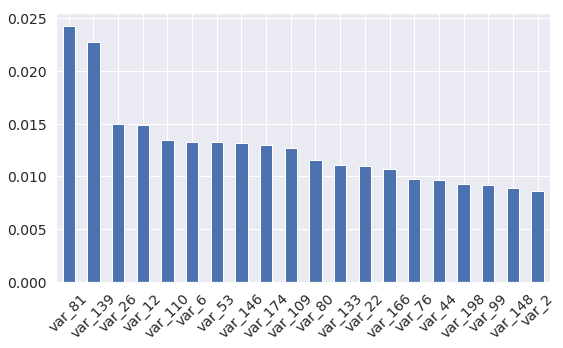

In [46]:
import matplotlib.pyplot as plt

feature_value_names = df.columns[2:]
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(pipe_rf.named_steps['RandomForestClassifier'].feature_importances_, feature_value_names)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances[:20].plot(x='Features', y='Importance', kind='bar', figsize=(8,5), rot=45, fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [47]:
# Select out the more important features
X_new = X_raw.loc[:, f_importances[f_importances>0.005].index]

In [48]:
X_new.head()

,var_81,var_139,var_26,var_12,var_110,var_6,var_53,var_146,var_174,var_109,...,var_115,var_121,var_154,var_67,var_173,var_192,var_127,var_89,var_91,var_107
0,13.8372,15.6599,-5.1488,14.0137,2.0323,5.1187,5.1736,11.5659,18.5618,24.3627,...,1.5093,9.7268,10.4838,22.4321,3.1531,3.1364,-0.7338,-1.7069,6.7806,17.1554
1,18.1782,16.1622,-11.7684,14.0239,6.6203,5.6208,6.6885,8.9231,30.2645,13.0858,...,4.1569,9.5018,-0.5687,7.9344,5.5134,2.5837,2.4354,12.2301,6.8852,32.0888
2,15.7811,8.6674,-7.9940,14.1929,3.2304,6.9427,6.4059,11.4934,25.6820,20.3882,...,2.9044,8.9573,-5.1747,9.8565,-5.8234,1.6704,-2.5511,2.1447,7.0883,8.6273
3,10.5404,8.9821,0.8135,13.8463,4.2827,5.8428,5.2091,10.4994,14.7483,14.4135,...,-2.5459,11.3025,17.0336,23.6143,11.7134,0.7178,-1.3683,7.5509,7.0364,7.0874
4,13.3317,13.9547,3.1736,13.8481,-0.1937,5.9405,5.7555,11.5670,18.4685,28.2749,...,-3.6135,12.7140,4.7022,1.6184,2.3705,-0.1508,7.0642,3.7954,7.0065,10.6617


In [49]:
f_importances[f_importances>0.005].sum()

0.4810685907517368

Total importance of chosen features: $$\int = 48.1\%$$

In [50]:
X_new, X_test, y_new, y_test = train_test_split(X_new, y_raw, test_size=0.2, random_state=0, stratify=y_raw)

Giving an example of Decision Tree. (200 features / 54 features)  

In [51]:
# Here just use a simple demo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
param_grid = [{'clf__min_samples_split': [2],
               'clf__min_samples_leaf': [5000]}]

param_grids['dt'] = param_grid

gsDT = GridSearchCV(pipe_clfs['dt'], param_grid=param_grids['dt'],
                    cv=StratifiedKFold(n_splits=4, random_state=0),
                    scoring="roc_auc", n_jobs=-1, verbose=1)

gsDT.fit(X, y)
DT_best = gsDT.best_estimator_
print(gsDT.best_score_, gsDT.best_estimator_)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    4.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.4s finished


0.606473524267178 Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=5000,
                                        min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=0,
                                        splitter='best'))],
         verbose=False)


In [52]:
# # Draw the tree with original features
# from pydotplus import graph_from_dot_data
# from sklearn.tree import export_graphviz
# from IPython.display import Image

# feature_value_names = df.columns[2:]
# dot_data = export_graphviz(DT_best.named_steps['clf'],
#                            filled=True, 
#                            rounded=True,
#                            class_names=['0', 
#                                         '1'],
#                            feature_names=feature_value_names,
#                            out_file=None) 

# graph = graph_from_dot_data(dot_data) 

# Image(graph.create_png())

In [53]:
param_grid = [{'clf__min_samples_split': [2],
               'clf__min_samples_leaf': [20000]}]

param_grids['dt'] = param_grid

gsDT = GridSearchCV(pipe_clfs['dt'], param_grid=param_grids['dt'],
                    cv=StratifiedKFold(n_splits=4, random_state=0),
                    scoring="roc_auc", n_jobs=-1, verbose=1)

gsDT.fit(X_new, y_new)
DT_best = gsDT.best_estimator_
print(gsDT.best_score_, gsDT.best_estimator_)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    6.9s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    7.1s finished


0.61094332278683 Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=20000,
                                        min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=0,
                                        splitter='best'))],
         verbose=False)


In [54]:
# # Draw the tree with selected features
# feature_value_names = f_importances[f_importances>0.005].index
# dot_data = export_graphviz(DT_best.named_steps['clf'],
#                            filled=True, 
#                            rounded=True,
#                            class_names=['0', 
#                                         '1'],
#                            feature_names=feature_value_names,
#                            out_file=None) 

# graph = graph_from_dot_data(dot_data) 

# Image(graph.create_png()) 

## Ensemble models

- **Stacking**
- Idea: learn an extra model to aggregate all the results of different models to get a final result.    
$$f(\hat{y}_1, \hat{y}_2, \hat{y}_3, ...)$$  
    - Simply, the $f(...)$ can be a vote function.
    - But stacking uses a more complicated function, like a logistic model.
    $$\hat{y} = \frac{1}{1+e^{-z}}$$  
    where,  
    $$z = w_0 + w_1*\hat{y}_1 + w_2*\hat{y}_2 + ...$$  
- When to use: if you have a huge data.  

In [55]:
X, X_test, y, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=0, stratify=y_raw)
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=0, stratify=y_test)

In [56]:
# Ensemble - Stacking - Logistic Regression
# something wrong with the sklearn version. Cannot import StackingClassifier
from sklearn.ensemble import StackingClassifier
stackingC = StackingClassifier(estimators=[('rf', RF_best), ('lr', LR_best), ('dt', DT_best), #('knn', KNN_best), ('svc', SVC_best),   ##KNN makes model so large
('mlp', MLP_best), ('xgb', XGB_best), ('gnb', GNB_best)], final_estimator=LogisticRegression(), n_jobs=-1, verbose=1)
stackingC.fit(X, y)
y_pred_stacking = stackingC.predict_proba(X_test).T[1]
# print(confusion_matrix(y_test, y_pred_stacking))
print(roc_auc_score(y_test, y_pred_stacking))

ImportError: cannot import name 'StackingClassifier'

In [57]:
# Ensemble - Stacking - Voting
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[('rf', RF_best), ('lr', LR_best), ('dt', DT_best), #('knn', KNN_best), ('svc', SVC_best),   ##KNN makes model so large
('mlp', MLP_best), ('xgb', XGB_best), ('gnb', GNB_best)], voting='soft', n_jobs=-1)
votingC.fit(X, y)
y_pred_stacking = votingC.predict_proba(X_test).T[1]
# print(confusion_matrix(y_test, y_pred_stacking))
print(roc_auc_score(y_test, y_pred_stacking))

0.881101434185382


# Conclusion

### Model  selection

GNB is the best single model for this dataset. 

    1. Fast & well performance

    2. This dataset fits to GNB’s assumption of normal distribution.

### Further improvements
 
Ensemble models is an excellent way to improve the final prediction. 


In [58]:
# FOR SUBMISSION
df_test = pd.read_csv(FILEDIR + 'test.csv',
                 header=0)
y_pred_voting = votingC.predict_proba(df_test.iloc[:,1:]).T[1]
df_test['target'] = y_pred_voting
df_sub = df_test.loc[:,['ID_code', 'target']]
df_sub.to_csv('submission.csv', index=False)